Names: Yuki Torigata, Sayana Imash, Fong Ken Rui

In [1]:
# your import statements
import numpy as np
import matplotlib.pyplot as plt

## WorkSheet Instructions ##

Before you begin you should have read and worked through Lab 4.

 I recommend that you do this worksheet in a python
  notebook and share screen.  This method does mean one person will do the typing.  When complete, print or Latex to pdf and upload to CANVAS.
  

Q1. From the following tableau, which includes an embedded higher-order Runge Kutta, write out the equations for the Runge-Kutta method (including all k terms, and the term for $y_{n+1}$ for:

a. the embedded 4th order scheme

$$
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+ \frac{1}{5}k_1, t_n+\frac{1}{5}h)\\
    k_3 = h f(y_n + \frac{3}{40}k_1 + \frac{9}{40}k_2, t_n+\frac{3}{10} h) \\
    ... \\
    y_{n+1} = y_n 
  \end{array}
$$
$$
  y{*}_{n+1}=y_n+\frac{2825}{27648}k_1+\frac{18575}{48384}k_3+\frac{13525}{55296}k_4 + \frac{277}{14336}k_5+\frac{1}{4}k_6
$$ 
$where:$
$$ k_{1} = hf(y_{n}, t_{n}) $$

$$k_{2} = hf(y_{n} +\frac{1}{5}k_{1}, t_{n} + \frac{1}{5}h)$$

$$k_{3} = hf(y_{n} +\frac{3}{40}k_{1}+\frac{9}{40}k_{2}, t_{n} + \frac{3}{10}h)$$

$$k_{4} = hf(y_{n} +\frac{3}{10}k_{1}+\frac{-9}{10}k_{2}+\frac{6}{5}k_{3}, t_{n} + \frac{3}{5}h)$$
$$....$$
b. the 5th order scheme

$$
  y_{n+1}=y_n+\frac{37}{378}k_1+\frac{250}{621}k_3+\frac{125}{594}k_4+\frac{512}{1771}k_6
$$ 


c. an estimate of the truncation error of the 4th order scheme

$$
 \Delta_{\rm est}(i)=y_{n+1}(i) - y_{n+1}^{}(i) = \sum^{6}{i=1}(c_i-c{i}^{})k_i = (\frac{37}{378}-\frac{2825}{27648} )k_1 + (\frac{250}{621} - \frac{18575}{48384})k_3 + (\frac{125}{594} - \frac{13525}{55296})k_4 + (0 - \frac{277}{14336}) + (\frac{512}{1771} - \frac{1}{4})k_6
$$

Q2. Write out the tableau for Heun’s/Ralston method, described by:
$$
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+\frac{2}{3}k_1, t_n+\frac{2}{3}h)\\
    y_{n+1} = y_n + \frac{1}{4}k_1 + \frac{3}{4}k_2
  \end{array}
$$

*This is part of Problem Tableau from the lab*



$$
\begin{array}{|c|c|cc|c|} \hline
i & a_i & {b_{ij}} & & c_i \\ \hline
1 & 0 & 0 & 0  & \frac{1}{4}\\
2 & \frac{2}{3} & \frac{2}{3} & 0  & \frac{3}{4}\\ \hline
{j=} & & 1 & 2 & \\ \hline
\end{array}
$$

Q3. Now we'll revisit the simple un-damped harmonic oscillator (that we first saw in lab 1) with $\beta = 0$:
$$\frac{d^2 y}{d t^2} = {- \gamma y}$$

re-writing, with $u=dy/dt$. Then:

\begin{align}
\frac{dy}{dt} &= u\\
\frac{du}{dt} &= - {\gamma} y
\end{align}

In this un-damped system, the solution is $y = sin(\sqrt \gamma t)$ 

This question will explore using various different methods to solve this equation in time. The following code solves this set of 2 ODEs using the forward Euler method. 

In [16]:
def analytic(t, coeffs):
    return np.sin(np.sqrt(coeffs.gm)*t)

In [2]:
import json
import numpy as np
from collections import namedtuple

# Since we need to keep track of both y, and dy/dt (=u), we will define a 2D array of y:
# The first dimension, y[0], will hold successive y values
# The second dimension, y[1], will hold successive u values

#
# specify the derivative function
#
def derivs_oscillator(coeffs, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivative
                     # the first dimension is holding dy/dt
                     # the second dimension is holding d2y/dt2 (i.e. du/dt)
  f[0]=y[1] # Recall that y[1] = u
  f[1]= -1.*coeffs.gm*y[0]
  return f

# function to step forward one timestep using forward Euler: y_i+1 = y_i + dy/dt_i
def euler(coeffs,y,derivs):
  ynew=y + coeffs.dt*derivs(coeffs,y)
  return ynew

# set coefficients including initial conditions:
initialVals = {
    'yinitial': [0., 1.],
    't_beg': 0.,
    't_end': 40.,
    'dt': 0.1,
    'gm': 1.
}

initvals = namedtuple('initvals',
                      'dt gm t_beg t_end yinitial')
coeffs = initvals(**initialVals)


# create numpy of times
time=np.arange(coeffs.t_beg,coeffs.t_end,coeffs.dt)

# set initial value of y
y=coeffs.yinitial

#calculate the number of steps by the length of our time array
nsteps=len(time)

#
# integrate and save the result in array ys
#
ys_euler=np.empty([nsteps],np.float64)

for i in range(nsteps):
    # calculate new values of y for each timestep, by passing the derivs_oscillator function as an argument:
    y=euler(coeffs,y,derivs_oscillator)
    ys_euler[i]=y[0] # we're only saving the first dimension, which is y, not the second dimension, dy/dt = u



Q3.1  Plot the resulting y values. Is this behaviour physical? Is this behaviour expected? Why/why not?

This behaviour is not physical since a damped harmonic oscillator should decay in amplitude over time.

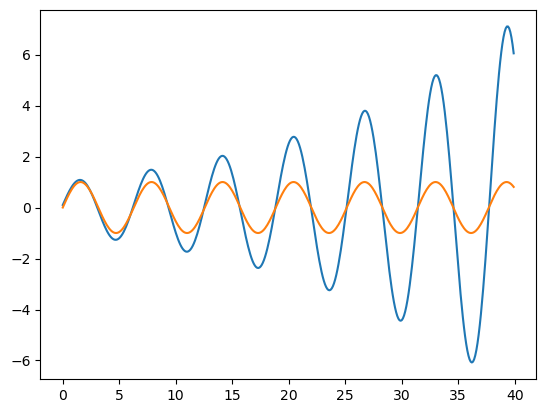

In [17]:
plt.plot(time, ys_euler)
plt.plot(time, analytic(time, coeffs))

Q3.2 Now adapt the code provided above to use the mid-point method instead of forward Euler. How does this change the solution? Is this expected?

Mid-point method:
$$
\begin{aligned}
   \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+\frac{1}{2}k_1, t_n+\frac{1}{2}h)\\
    y_{n+1} = y_n + k_2
  \end{array}
\end{aligned}
$$ 

In [4]:
def derivs_oscillator(coeffs, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivative
                     # the first dimension is holding dy/dt
                     # the second dimension is holding d2y/dt2 (i.e. du/dt)
  f[0]=y[1] # Recall that y[1] = u
  f[1]= -1.*coeffs.gm*y[0]
  return f


def midpoint(coeffs,y,derivs):
  k1 = coeffs.dt*derivs(coeffs, y)
  k2 = coeffs.dt*derivs(coeffs, y + 0.5*k1)
  ynew = y + k2
  return ynew

# set coefficients including initial conditions:
initialVals = {
    'yinitial': [0., 1.],
    't_beg': 0.,
    't_end': 40.,
    'dt': 0.1,
    'gm': 1.
}

initvals = namedtuple('initvals',
                      'dt gm t_beg t_end yinitial')
coeffs = initvals(**initialVals)


# create numpy of times
time=np.arange(coeffs.t_beg,coeffs.t_end,coeffs.dt)

# set initial value of y
y=coeffs.yinitial

#calculate the number of steps by the length of our time array
nsteps=len(time)

#
# integrate and save the result in array ys
#
ys_midpoint = np.empty([nsteps],np.float64)

for i in range(nsteps):
    # calculate new values of y for each timestep, by passing the derivs_oscillator function as an argument:
    y=midpoint(coeffs,y,derivs_oscillator)
    ys_midpoint[i]=y[0] # we're only saving the first dimension, which is y, not the second dimension, dy/dt = u


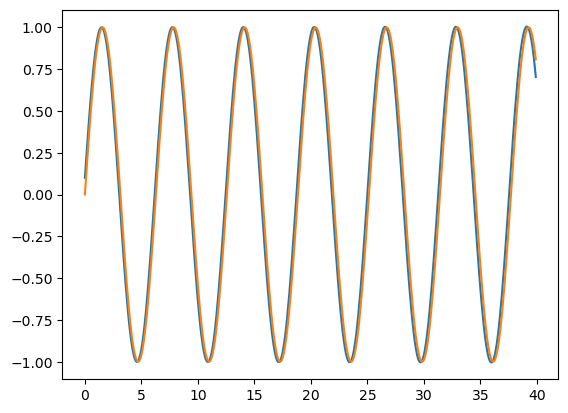

In [12]:
plt.plot(time, ys_midpoint)
plt.plot(time, analytic(time, coeffs))


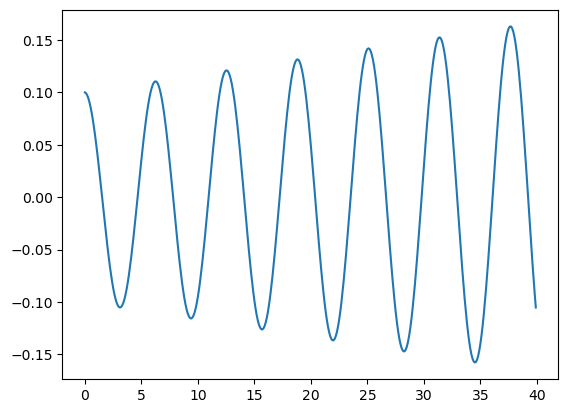

In [13]:
plt.plot(time, ys_midpoint - analytic(time, coeffs))

Q3.3 Adapt the code again to use Heun's method, as from Q2. Plot the results, and compare to the forward Euler and mid-point methods. (Compare the errors from the analytical solution)

Heun’s/Ralston method, described by:
$$
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+\frac{2}{3}k_1, t_n+\frac{2}{3}h)\\
    y_{n+1} = y_n + \frac{1}{4}k_1 + \frac{3}{4}k_2
  \end{array}
$$

Optional Q3.4 - repeat Q3.3 but with a 4th order Runge-Kutta scheme.  

In [8]:
def derivs_oscillator(coeffs, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivative
                     # the first dimension is holding dy/dt
                     # the second dimension is holding d2y/dt2 (i.e. du/dt)
  f[0]=y[1] # Recall that y[1] = u
  f[1]= -1.*coeffs.gm*y[0]
  return f


def Heun(coeffs,y,derivs):
  k1 = coeffs.dt*derivs(coeffs, y)
  k2 = coeffs.dt*derivs(coeffs, y + (2/3)*k1)
  ynew = y + (1/4)*k1 + (3/4)*k2
  return ynew

# set coefficients including initial conditions:
initialVals = {
    'yinitial': [0., 1.],
    't_beg': 0.,
    't_end': 40.,
    'dt': 0.1,
    'gm': 1.
}

initvals = namedtuple('initvals',
                      'dt gm t_beg t_end yinitial')
coeffs = initvals(**initialVals)


# create numpy of times
time=np.arange(coeffs.t_beg,coeffs.t_end,coeffs.dt)

# set initial value of y
y=coeffs.yinitial

#calculate the number of steps by the length of our time array
nsteps=len(time)

#
# integrate and save the result in array ys
#
ys_Heun = np.empty([nsteps],np.float64)

for i in range(nsteps):
    # calculate new values of y for each timestep, by passing the derivs_oscillator function as an argument:
    y=Heun(coeffs,y,derivs_oscillator)
    ys_Heun[i]=y[0] # we're only saving the first dimension, which is y, not the second dimension, dy/dt = u


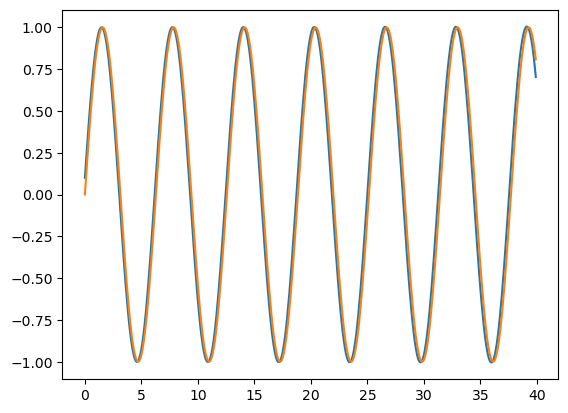

In [14]:
plt.plot(time, ys_Heun)
plt.plot(time, analytic(time, coeffs))

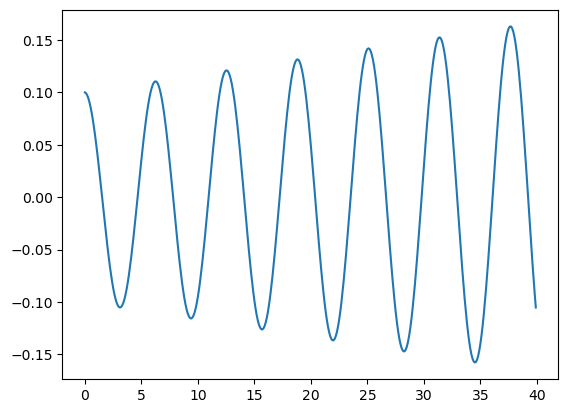

In [15]:
plt.plot(time, ys_Heun - analytic(time, coeffs))

The midpoint and Heun's methods give the expected solution with constant amplitude over time. They both also produce similar error curves.

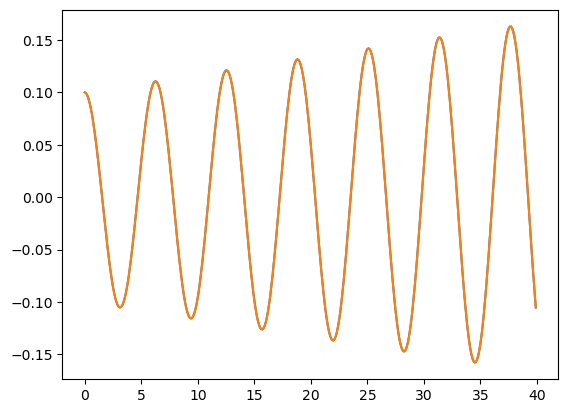

In [18]:
plt.plot(time, ys_midpoint - analytic(time, coeffs))
plt.plot(time, ys_Heun - analytic(time, coeffs))

In [19]:
def RK4(coeffs,y,derivs):
  k1 = coeffs.dt*derivs(coeffs, y)
  k2 = coeffs.dt*derivs(coeffs, y + (1/2)*k1)
  k3 = coeffs.dt*derivs(coeffs, y + (1/2)*k2)
  k4 = coeffs.dt*derivs(coeffs, y + k3)
  ynew = y + (1/6)*k1 + (1/3)*k2 + (1/3)*k3 + (1/6)*k4
  return ynew

# set coefficients including initial conditions:
initialVals = {
    'yinitial': [0., 1.],
    't_beg': 0.,
    't_end': 40.,
    'dt': 0.1,
    'gm': 1.
}

initvals = namedtuple('initvals',
                      'dt gm t_beg t_end yinitial')
coeffs = initvals(**initialVals)


# create numpy of times
time=np.arange(coeffs.t_beg,coeffs.t_end,coeffs.dt)

# set initial value of y
y=coeffs.yinitial

#calculate the number of steps by the length of our time array
nsteps=len(time)

#
# integrate and save the result in array ys
#
ys_RK4 = np.empty([nsteps],np.float64)

for i in range(nsteps):
    # calculate new values of y for each timestep, by passing the derivs_oscillator function as an argument:
    y=RK4(coeffs,y,derivs_oscillator)
    ys_RK4[i]=y[0] # we're only saving the first dimension, which is y, not the second dimension, dy/dt = u


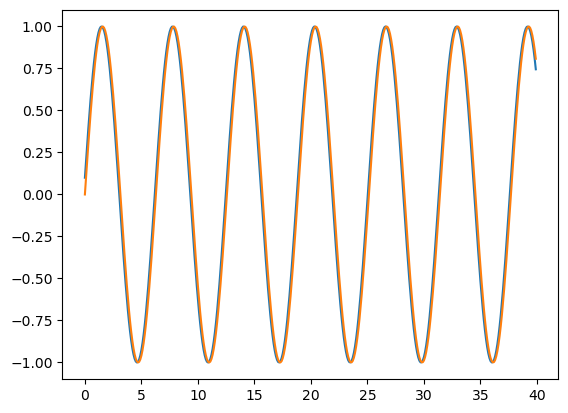

In [20]:
plt.plot(time, ys_RK4)
plt.plot(time, analytic(time, coeffs))

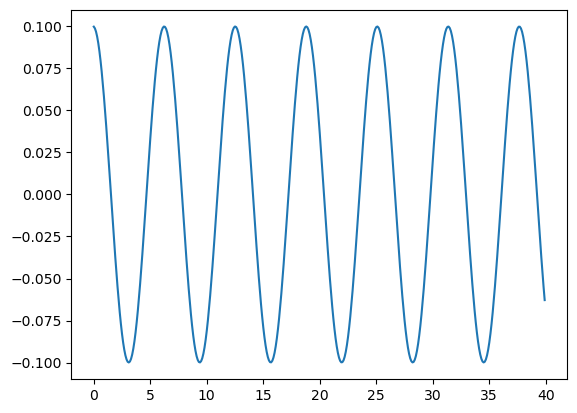

In [21]:
plt.plot(time, ys_RK4 - analytic(time, coeffs))

The initial error for RK4 is similar to midpoint and Heun's method, except that it grows more slowly with timestep.